# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pd.set_option('display.max_columns', 50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/02_Education and Research/Data_Science/Ajak Deliverables

/content/drive/MyDrive/02_Education and Research/Data_Science/Ajak Deliverables


In [ ]:
df = pd.read_csv("Transactions.csv", parse_dates=['refresh_date'])

In [ ]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,3,2,2,9,2,1.909702e+07,399995.834888,1.259993e+07,-231714.43334,-6.557185e+06,0,-0.012133,9.386941e+06,9.743856e+06,-9655.913728,0.0,-24116.993988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31
1,4492101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.468574e+04,0.000000,0.000000e+00,0.00000,0.000000e+00,0,0.000000,-7.102100e+03,0.000000e+00,-7583.640000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31
2,85102140943881291064,0,1,0,0,0,1,0,0,0,1,0,0,0,0,-7.164047e+04,0.000000,0.000000e+00,0.00000,-1.950000e+02,0,0.000000,-7.164047e+04,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31
3,85202121774856516280,1,0,0,0,1,0,0,0,1,0,0,0,2,2,3.425462e+05,0.000000,1.164760e+03,0.00000,0.000000e+00,1,0.000000,0.000000e+00,7.030151e+04,272244.700000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31
4,0360380,7,0,0,0,1,0,0,0,1,0,0,0,2,0,-2.262721e+05,0.000000,3.278145e+03,0.00000,0.000000e+00,0,0.000000,-1.113566e+05,-2.018566e+04,0.000000,0.0,-94729.890000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31


In [ ]:
df.shape

(360325, 40)

In [ ]:
df['CONTACT_ID'].value_counts()

85201141034664489650    36
4330197                 36
85101162853723556649    36
0269895                 36
4413761                 36
                        ..
4345882                 32
85102161373760142116    32
85102122307327011208    32
4391177                 32
10751182883962425731    32
Name: CONTACT_ID, Length: 10010, dtype: int64

In [ ]:
df['refresh_date'].dt.year.value_counts()

2019    120120
2018    120120
2020    110075
2017     10010
Name: refresh_date, dtype: int64

In [ ]:
df['d_year']=df['refresh_date'].dt.year

In [ ]:
df.d_year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
360320    2020
360321    2020
360322    2020
360323    2020
360324    2020
Name: d_year, Length: 360325, dtype: int64

In [ ]:
new_data=df

In [ ]:
new_data

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date,total_sales,d_year
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,3,2,2,9,2,1.909702e+07,399995.834888,1.259993e+07,-231714.43334,-6.557185e+06,0,-0.012133,9.386941e+06,9.743856e+06,-9.655914e+03,0.0,-24116.993988,0.0,0.0,0.000,0.000,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31,1.299992e+07,2017
1,4492101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.468574e+04,0.000000,0.000000e+00,0.00000,0.000000e+00,0,0.000000,-7.102100e+03,0.000000e+00,-7.583640e+03,0.0,0.000000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31,0.000000e+00,2017
2,85102140943881291064,0,1,0,0,0,1,0,0,0,1,0,0,0,0,-7.164047e+04,0.000000,0.000000e+00,0.00000,-1.950000e+02,0,0.000000,-7.164047e+04,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31,0.000000e+00,2017
3,85202121774856516280,1,0,0,0,1,0,0,0,1,0,0,0,2,2,3.425462e+05,0.000000,1.164760e+03,0.00000,0.000000e+00,1,0.000000,0.000000e+00,7.030151e+04,2.722447e+05,0.0,0.000000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31,1.164760e+03,2017
4,0360380,7,0,0,0,1,0,0,0,1,0,0,0,2,0,-2.262721e+05,0.000000,3.278145e+03,0.00000,0.000000e+00,0,0.000000,-1.113566e+05,-2.018566e+04,0.000000e+00,0.0,-94729.890000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31,3.278145e+03,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360320,85101112114944243030,52,33,0,0,5,5,0,0,2,2,0,0,5,2,1.467283e+05,1948.425000,7.944085e+04,-12653.65500,-1.701488e+04,1,-0.086238,4.351357e+04,-2.821572e+04,1.398568e+05,0.0,-8426.425000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.467283e+05,0.000000e+00,0.0,0.0,2020-11-30,8.138928e+04,2020
360321,0344423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.662076e+04,0.000000,0.000000e+00,0.00000,0.000000e+00,0,0.000000,-1.662076e+04,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000000e+00,-1.662076e+04,0.0,0.0,2020-11-30,0.000000e+00,2020
360322,85202111883442782693,33,2,0,0,7,1,0,0,2,1,0,0,4,3,3.265858e+04,0.000000,2.511930e+03,0.00000,-3.913810e+03,3,0.000000,-2.334539e+04,1.223747e+04,3.180329e+04,0.0,0.000000,0.0,0.0,11963.205,11963.205,0.0,0.0,0.0,2.069537e+04,0.000000e+00,0.0,0.0,2020-11-30,2.511930e+03,2020
360323,00872163603934484565,127,9,2,1,17,5,2,1,3,3,2,1,10,3,5.160471e+05,0.000000,4.597563e+05,0.00000,-3.972196e+04,9,0.000000,4.167400e+02,3.124416e+05,1.137526e+05,0.0,0.000000,0.0,0.0,89436.175,89436.175,0.0,0.0,0.0,1.748960e+03,4.248620e+05,0.0,0.0,2020-11-30,4.597563e+05,2020


In [ ]:
new_data.to_csv('new_data.csv')

# Combine `sales_curr` and `sales_12M`

In [ ]:
df['total_sales'] = df['sales_curr'] + df['sales_12M']

NameError: ignored

In [ ]:
df.total_sales

In [ ]:
df['total_sales'].describe()

In [ ]:
d2017 = df[(df.total_sales >= 150000) & (df.d_year==2017)]

In [ ]:
d2017

In [ ]:
gt_150k =df[df.total_sales >= 150000]

In [ ]:
gt_150k

In [ ]:
lt_150k =df[df.total_sales < 150000]

In [ ]:
lt_150k

In [ ]:
below_150k=

# Data Cleaning

Before you change ANYTHING with the data - besides the above :) - do your train-test split

In [ ]:
FEATURES = [
    'CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
    'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date',
]
TARGETS = 'total_sales'

In [ ]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'sales_curr', 'sales_12M',
    'refresh_date', 'new_Fund_added_12M','no_of_Redemption_12M_1',
]

COLS_TO_KEEP = [
    'CONTACT_ID',
    'no_of_sales_12M_1',
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'redemption_curr',
    'redemption_12M', 'redemption_rate', 'aum_AC_EQUITY',
    'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY',
    'aum_AC_MULTIPLE', 'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE',
    'aum_AC_TARGET', 'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF',
    'aum_P_MF', 'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT',
]

## Partition training and testing

In [ ]:
training_rows = df['refresh_date'].dt.year.isin([2017, 2018, 2019])
testing_rows = df['refresh_date'].dt.year.isin([2020])

X = df.loc[training_rows, FEATURES].copy()
y_reg = df.loc[training_rows, TARGETS].copy()
y_cl = df.loc[training_rows, 'new_Fund_added_12M'].copy()

y_holdout_test = df.loc[testing_rows, TARGETS].copy() # forget about this for now

In [ ]:
X.shape

(250250, 39)

In [ ]:
y_holdout_test.shape

(110075,)

## Custom Cleaning Functions

Let's create functions that do some basic housekeeping

In [ ]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)


def negative_to_zero(series):
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=24
)
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

[Back to Top](#Index)
## Create Cleaning Pipeline

- Pipeline for target variable
- Pipeline for features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)

Make pipeline for regression target variable

In [ ]:
def extract_redemption(df):
    redemp_cols = [col for col in df.columns if 'redemption' in col.lower()]
    return df[redemp_cols].copy()

def replace_with_zero(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: min(0, x))
    return df

In [ ]:
extract_redemption_trans = FunctionTransformer(extract_redemption)
replace_with_zero_trans = FunctionTransformer(replace_with_zero)

In [ ]:
redemption_pipe = Pipeline([
    ('extract_redemption_trans', extract_redemption_trans),
    ('replace_with_zero_trans', replace_with_zero_trans),
    ('StandardScaler', StandardScaler())
])

In [ ]:
pd.DataFrame(
    redemption_pipe.fit_transform(X_train),
    index=X_train.index,
    columns=[col for col in X_train.columns if 'redemption' in col.lower()]
)

,no_of_Redemption_12M_1,no_of_Redemption_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_Redemption_12M_10K,redemption_curr,redemption_12M,redemption_rate
122101,0.0,0.0,0.0,0.0,0.068414,0.116706,0.004086
46186,0.0,0.0,0.0,0.0,0.068414,0.116706,0.004086
41126,0.0,0.0,0.0,0.0,0.045743,-0.994636,0.004086
30070,0.0,0.0,0.0,0.0,0.067219,0.091516,0.004086
232410,0.0,0.0,0.0,0.0,0.068414,0.116706,0.004086
...,...,...,...,...,...,...,...
190609,0.0,0.0,0.0,0.0,0.068414,0.116706,0.004086
216465,0.0,0.0,0.0,0.0,0.068414,0.116706,0.004086
211136,0.0,0.0,0.0,0.0,0.068414,0.082220,0.004086
899,0.0,0.0,0.0,0.0,0.066797,0.116706,0.004086


In [ ]:
targ_pipe_reg = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero_trans', negative_to_zero_trans)
])

y_train_reg = targ_pipe_reg.fit_transform(y_train_reg)
y_test_reg = targ_pipe_reg.transform(y_test_reg)

Transform the classification target

In [ ]:
from sklearn.preprocessing import Binarizer

targ_pipe_cl = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('Binarizer', Binarizer(threshold=0))
])

y_train_cl = pd.Series(
    targ_pipe_cl
        .fit_transform(y_train_cl.to_frame())
        .reshape(-1), index=y_train_cl.index)
y_test_cl = pd.Series(
    targ_pipe_cl
        .transform(y_test_cl.to_frame())
        .reshape(-1), index=y_test_cl.index)
y_test_cl

228198    1
240133    1
163658    1
176954    0
69498     1
         ..
239268    0
116033    0
238773    1
7527      1
11875     0
Length: 75075, dtype: int64

Create the pipeline for the features

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('power_transformer', PowerTransformer())
])

X_train_prepared = feat_pipe.fit(X_train).transform(X_train)
X_test_prepared = feat_pipe.transform(X_test)

**TRANSFORM** Test set

In [ ]:
X_train_prepared = pd.DataFrame(
    X_train_prepared,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

[Back to Top](#Index)
# Model building
- Evaluate baseline model
- Create new models
- Create evaluation function and cross validate

In [ ]:
def evaluate_model(model, X, y):
    cvscore=(
        np.mean(
            (-cross_validate(model, X, y, scoring='neg_root_mean_squared_error')['test_score'])))
    print("Cross Validation Score:\t", cvscore)

    print('R-squared:\t', model.score(X, y))
    print('-'*55)
    preds = model.predict(X)
    lim = max(preds.max(), y.max())
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.scatter(x=y, y=preds, alpha=0.4)
    ax.plot([0, lim], [0, lim])
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])
    ax.set_title("Actual vs Predicted - Regression")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted");

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import cross_validate
import xgboost as xgb
from pprint import pprint

## Random Forest Regressor

The random forest Regressor gives the best results

we tried 2 different hyperparameter tuning for this method

* RandomSearchCV
* GridSearchCV

---


Both give bad results than the main one so we go with the normal Random Forest Regressor

### Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=5)

In [ ]:
X_train_prepared.shape

(175175, 34)

In [ ]:
X_train_prepared.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_sales_12M_10K',
       'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
       'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
       'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
       'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
       'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
       'No_of_asset_curr', 'AUM', 'redemption_curr', 'redemption_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'],
      dtype='object')

In [ ]:
rfr.fit(X_train_prepared, y_train_reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
-cross_validate(
    rfr,
    X_train_prepared,
    y_train_reg,
    cv=3,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)['test_score']

array([335871.83582753, 342818.53520686, 325131.78997776])

Cross Validation Score:	 319423.5656265346
R-squared:	 0.9840653345168494
-------------------------------------------------------


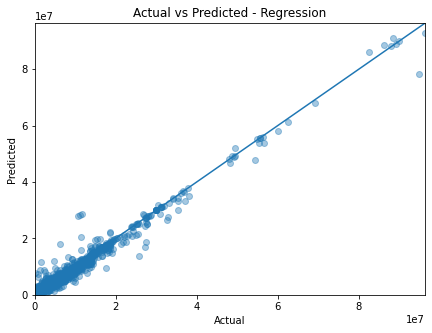

In [ ]:
evaluate_model(rfr, X_train_prepared, y_train_reg)

In [ ]:
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### **Random Hyperparameter Grid**



---

run to give it a try by changing parameters  will take a little bit of time



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 3, 5, 7, 10]}


In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_prepared, y_train_reg)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 7}

Cross Validation Score:	 336539.762154675
R-squared:	 0.9840653345168494
-------------------------------------------------------


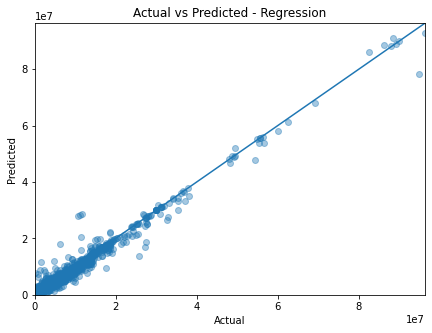

In [ ]:
base_accuracy = evaluate_model(rfr,  X_train_prepared, y_train_reg)

Cross Validation Score:	 382645.2956470183
R-squared:	 0.9775628017173258
-------------------------------------------------------


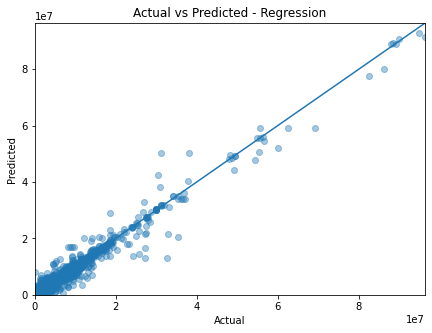

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_model(best_random,  X_train_prepared, y_train_reg)

### **Grid Search with Cross Validation**

---

ajak only run to give it a try by changing parameters  will take a little bit of time

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1, 2, 3, 10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit( X_train_prepared, y_train_reg)
print(grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.3min finished


{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 10}


In [ ]:
grid_search.best_params_

In [ ]:
grid_search_accuracy = evaluate_model(grid_search,  X_train_prepared, y_train_reg)

# feature importance of RandomForestRegressor



---
if you want a little bit of refined picture  try to savefig command and add insert the image in the drive.


In [ ]:
rfr.feature_importances_

array([9.53973083e-03, 2.31043874e-01, 1.04180676e-02, 1.74617928e-03,
       2.92637689e-03, 7.18178465e-03, 3.13174351e-03, 3.11481815e-03,
       2.22328774e-03, 3.21458736e-03, 1.03898576e-03, 1.35148373e-02,
       1.20900511e-03, 6.83512531e-02, 5.49630152e-03, 4.10729857e-01,
       4.34750000e-03, 8.06703834e-02, 1.81939167e-02, 1.79499859e-02,
       3.05994401e-05, 5.27562982e-03, 2.14838117e-03, 1.96084562e-04,
       7.44501578e-03, 8.83913865e-05, 6.17932986e-05, 2.59981837e-04,
       7.85212765e-05, 4.16517929e-02, 3.53749600e-02, 3.28361612e-04,
       4.09126253e-04, 1.06088846e-02])

In [ ]:
X_train_prepared.rename(columns={'CONTACT_ID':'CONTACT ID', 'no_of_sales_12M_1': '1 $ sales in 12months',
                                 'no_of_sales_12M_10K':'10k$ sales in 12months',
                                 'no_of_Redemption_12M_10K':'10k$ sales in 12months',
                                 'no_of_funds_sold_12M_1':'1$ funds sold in 12months',
                                 'no_of_funds_redeemed_12M_1':'1$ funds redeemed in 12months',
                                 'no_of_fund_sales_12M_10K':'10k$ fund sales in 12months',
                                 'no_of_funds_Redemption_12M_10K':'10k$ funds_Redemption in 12months',
                                 'no_of_assetclass_sold_12M_1':'1$ asset sold in 12months',
                                 'no_of_assetclass_redeemed_12M_1':'1$ asset redeemed in 12months',
                                 'no_of_assetclass_sales_12M_10K':'10k$ asset sales in 12months',
                                 'no_of_assetclass_Redemption_12M_10K':'10k$ asset Redemption in 12months',
                                 'No_of_fund_curr':'Current Funds',
                                 'No_of_asset_curr':'Current Assets', 'AUM': 'Asset Under Management',
                                 'redemption_curr':'Current Redemption', 'redemption_12M':'Redemption in 12months',
                                 'redemption_rate':'Redemption Rate',
                                 'aum_AC_EQUITY':'Asset Under Management for Asset class 1',
                                 'aum_AC_FIXED_INCOME_MUNI':'Asset Under Management for Asset class 2',
                                 'aum_AC_FIXED_INCOME_TAXABLE':'Asset Under Management for Asset class 3',
                                 'aum_AC_MONEY':'Asset Under Management for Asset class 4',
                                 'aum_AC_MULTIPLE':'Asset Under Management for Asset class 5',
                                 'aum_AC_PHYSICAL_COMMODITY':'Asset Under Management for Asset class 6',
                                 'aum_AC_REAL_ESTATE':'Asset Under Management for Asset class 7',
                                 'aum_AC_TARGET':'Asset Under Management for Asset class 8',
                                 'aum_P_529':'Asset Under Management for Product type 1',
                                 'aum_P_ALT':'Asset Under Management for Product type 2',
                                 'aum_P_CEF':'Asset Under Management for Product type 3',
                                 'aum_P_ETF':'Asset Under Management for Product type 4',
                                 'aum_P_MF':'Asset Under Management for Product type 5',
                                 'aum_P_SMA':'Asset Under Management for Product type 6',
                                 'aum_P_UCITS':'Asset Under Management for Product type 7',
                                 'aum_P_UIT':'Asset Under Management for Product type 8'}, inplace=True)
# X_train_prepared.columns

Text(0.5, 0, 'Random Forest Feature Importance')

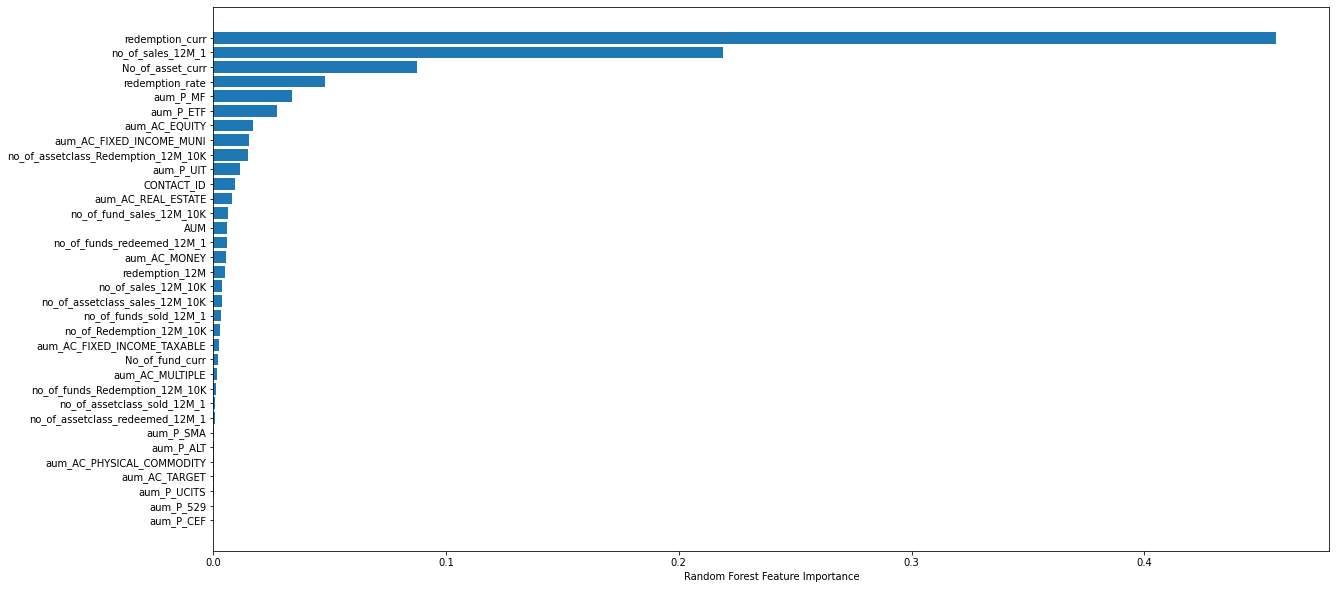

In [ ]:
# plt.barh(df.feature_names, rf.feature_importances_)
sorted_idx = rfr.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(X_train_prepared.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

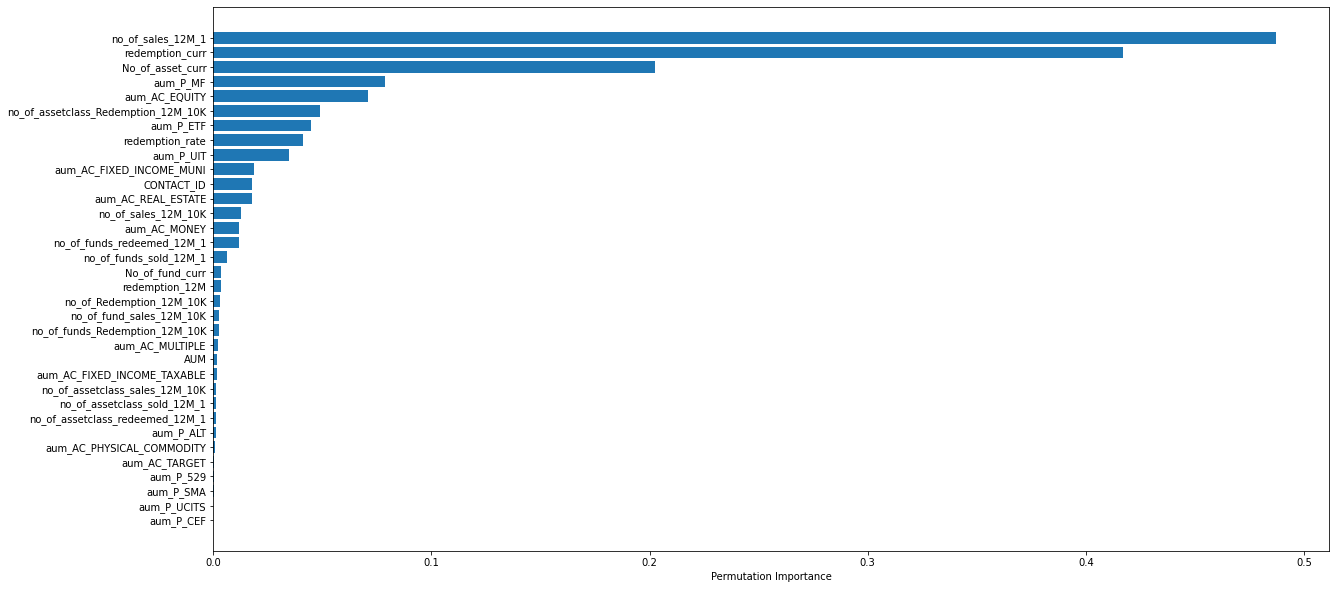

In [ ]:
from sklearn.inspection import permutation_importance
plt.figure(figsize=(20,10))

perm_importance = permutation_importance(rfr, X_test_prepared, y_test_reg)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train_prepared.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
y_test_reg_preds = rfr.predict(X_test_prepared)

# Lift Chart




---

i just need to do a tweek a little bit of this part and it will be good to go with the recommendations


 a sample liftchart excel sheet is in the ajak deliverables directory just have to replace the first 3 columns with this liftchart of yours and the formulas are adjusted in the sample lift chart by default so no need to worry the remaining columns will automatically be adjusted according to your new values.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
results = pd.DataFrame(data=y_test_reg.values, columns=['actual'], index=y_test_reg.index)
results['reg_preds'] = y_test_reg_preds
results['decile'] = pd.qcut(y_test_reg_preds, q=10, labels=False, retbins=False, duplicates = 'drop')
results['decile'] = ((results['decile']+1)*-1)+11

In [ ]:
file = results.groupby('decile').agg({'actual':['count', 'mean'], 'reg_preds': 'mean'})

In [ ]:
file.to_csv('Lift_Chart.csv')

# Linear Regression


the accuracy of this regression model was too low so we go  with the RFR part only


---


ajak have a look at it just a little

In [ ]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make a plot of predictions vs actual

In [ ]:
y_test_reg_preds = lr.predict(X_test_prepared)

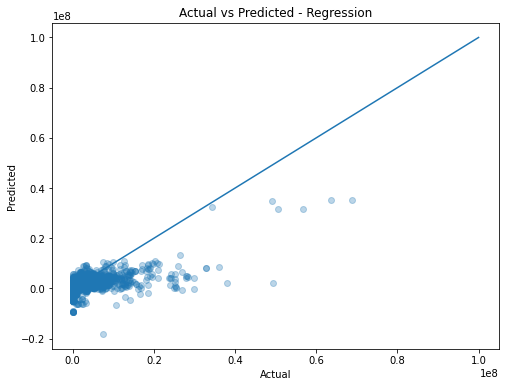

In [ ]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test_reg, y=y_test_reg_preds, alpha=0.3)

axes.plot([0, 100000000], [0,100000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

Cross Validation Score:	 829030.2423061209
R-squared:	 0.4175817295671158
-------------------------------------------------------


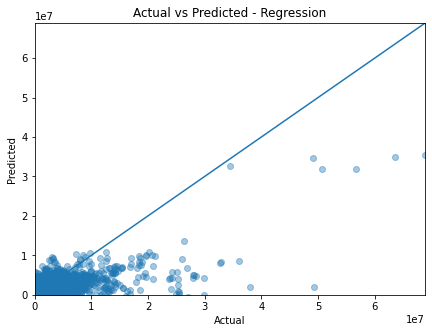

In [ ]:
evaluate_model(lr, X_test_prepared, y_test_reg)

## Classification

SVC was taking too long for our attempt for classification task so we tried going with the
GradientBoostingClassifier


---


just run this one and have a look at it. just for practise purpose

In [ ]:
y_train_cl

122101    0
46186     0
41126     0
30070     1
232410    0
         ..
190609    0
216465    0
211136    1
899       0
242082    0
Length: 175175, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_prepared, y_train_cl)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_test_preds = gbc.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test_cl,y_test_preds))

0.8686646686646686


In [ ]:
gbc.predict_proba(X_test_prepared)[:, 1]

array([0.7595276 , 0.52290711, 0.67759642, ..., 0.62105565, 0.874147  ,
       0.39330994])

[Back to Top](#Index)
## Residual Analysis
have a look a this part just look at it that sounds confusing skip that or else try to play with this thing a little bit.



can remove the whole part if you want meanwhile you being a statician can get something interesting from this part.

In [ ]:
y_test_reg_preds = lr.predict(X_test_prepared)

In [ ]:
# get the residuals
residuals = y_test_reg_preds - y_test_reg

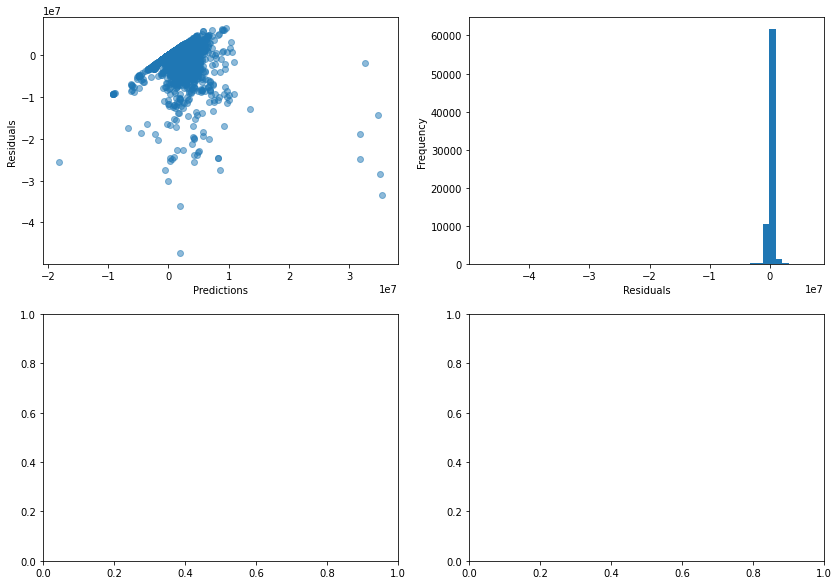

In [ ]:
# plot predictions vs residuals
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# plot scatter plot on upper left plot
axes[0,0].scatter(x=y_test_reg_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel='Predictions', ylabel='Residuals')

# plot a hist on upper right plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [ ]:
from statsmodels.api import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


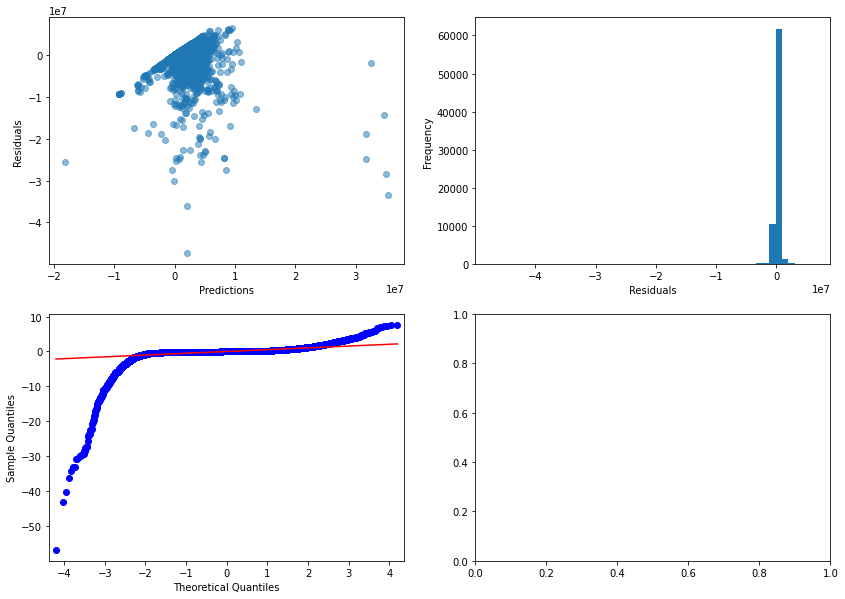

In [ ]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

In [ ]:
y_test_reg_preds

array([ 280784.45634046,  100161.87485299,  115464.80506497, ...,
        786938.45205433,  395506.25778256, -114165.19279314])

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
def evaluate_classifier(X, y, model):
    pass
    # print classification report
    # create lift charts
    # create gains charts

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf = RandomForestClassifier()

# rf.fit(X_train_prepared, y_train_cl)

In [ ]:
y_test_cl_preds = gbc.predict_proba(X_test_prepared)

In [ ]:
y_test_cl_preds

array([[0.2404724 , 0.7595276 ],
       [0.47709289, 0.52290711],
       [0.32240358, 0.67759642],
       ...,
       [0.37894435, 0.62105565],
       [0.125853  , 0.874147  ],
       [0.60669006, 0.39330994]])

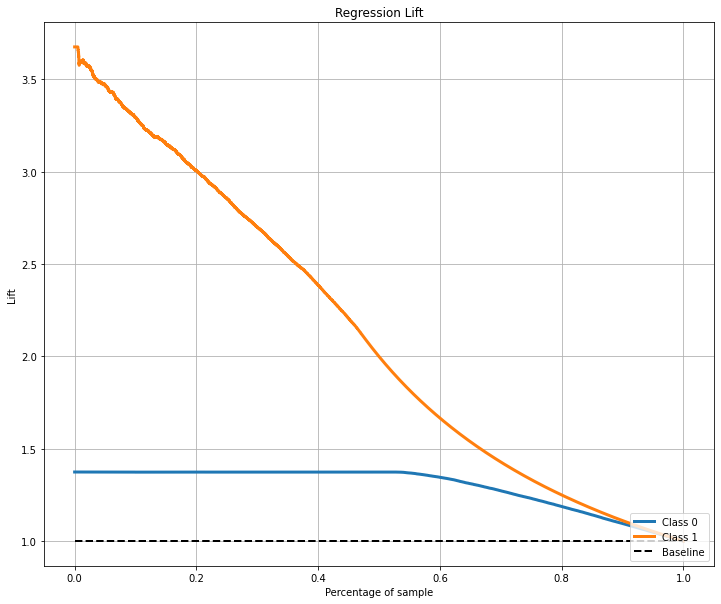

In [ ]:
skplt.metrics.plot_lift_curve(y_test_cl, y_test_cl_preds, figsize=(12,10), title="Regression Lift");

In [ ]:
np.sort(y_test_cl_preds)[:10]

array([[0.2404724 , 0.7595276 ],
       [0.47709289, 0.52290711],
       [0.32240358, 0.67759642],
       [0.00289798, 0.99710202],
       [0.17943906, 0.82056094],
       [0.00310929, 0.99689071],
       [0.21524554, 0.78475446],
       [0.00348719, 0.99651281],
       [0.20113858, 0.79886142],
       [0.49564179, 0.50435821]])

In [ ]:
y_test_reg

228198   269083.425
240133     3578.970
163658     9497.900
176954        0.000
69498     30529.080
            ...    
239268      399.720
116033        0.000
238773    20656.470
7527     157805.390
11875       509.420
Name: total_sales, Length: 75075, dtype: float64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
results = pd.DataFrame(data=y_test_reg.values, columns=['actual'], index=y_test_reg.index)
results['reg_preds'] = y_test_reg_preds
results['decile'] = pd.qcut(y_test_reg_preds, q=10, labels=False, retbins=False)
results['decile'] = ((results['decile']+1)*-1)+11

In [ ]:
results.groupby('decile').agg({'actual':['count', 'mean'], 'reg_preds': 'mean'})

actual               reg_preds
        count        mean        mean
decile                               
1        7508 1391534.952 1615320.985
2        7506  231069.730  444138.459
3        7503   54886.766   99347.285
4        7513    2095.467   23006.822
5        7506     773.335   20711.446
6        7509    7240.086    9256.870
7        7504    6674.795  -11667.470
8        7511   10415.154  -32362.306
9        7507   18323.507  -74047.038
10       7508   71479.118 -265934.048